In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
def load_data_from_file(file):
  data = np.loadtxt(file,delimiter=',')
  print(data)
  return (data)

In [10]:
data = load_data_from_file("/ex2data1.txt")

[[34.62365962 78.02469282  0.        ]
 [30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]
 [45.08327748 56.31637178  0.        ]
 [61.10666454 96.51142588  1.        ]
 [75.02474557 46.55401354  1.        ]
 [76.0987867  87.42056972  1.        ]
 [84.43281996 43.53339331  1.        ]
 [95.86155507 38.22527806  0.        ]
 [75.01365839 30.60326323  0.        ]
 [82.30705337 76.4819633   1.        ]
 [69.36458876 97.71869196  1.        ]
 [39.53833914 76.03681085  0.        ]
 [53.97105215 89.20735014  1.        ]
 [69.07014406 52.74046973  1.        ]
 [67.94685548 46.67857411  0.        ]
 [70.66150955 92.92713789  1.        ]
 [76.97878373 47.57596365  1.        ]
 [67.37202755 42.83843832  0.        ]
 [89.67677575 65.79936593  1.        ]
 [50.53478829 48.85581153  0.        ]
 [34.21206098 44.2095286   0.        ]
 [77.92409145 68.97235999  1.        ]
 [62.27101367 69.95445795

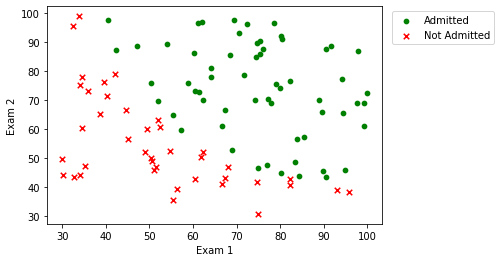

In [43]:
    negative = data[:,2] == 0
    positive = data[:,2] == 1
    axes = plt.gca()
    axes.scatter(data[positive][:,0], data[positive][:,1], marker='.', c='g', s=30, linewidth=3, label="Admitted")
    axes.scatter(data[negative][:,0], data[negative][:,1], marker='x',c='r', s=30,linewidths=3 ,label="Not Admitted")
    axes.set_xlabel("Exam 1")
    axes.set_ylabel("Exam 2")
    axes.legend(loc='upper right',frameon= True, fancybox = True, bbox_to_anchor=(1.35, 1), ncol=1);

In [32]:
X = np.c_[np.ones((data.shape[0],1)), data[:,0:2]]
y = np.c_[data[:,2]]

In [45]:
def sigmoid(z):
  return (1 / (1 + np.exp(-z)))


def costFunction(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
               
    if np.isnan(J[0]):
        return(np.inf)
    return J[0]
           
def gradient(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1,1)))
    
    grad =(1/m)*X.T.dot(h-y)

    return grad.flatten()

In [46]:
initial_theta = np.zeros(X.shape[1])
cost = costFunction(initial_theta, X, y)
grad = gradient(initial_theta, X, y)
print(cost)
print(grad)

0.6931471805599453
[ -0.1        -12.00921659 -11.26284221]


In [47]:
from scipy.optimize import minimize

In [50]:
res = minimize(costFunction, initial_theta, args=(X,y), method=None, jac=gradient, options={'maxiter':400})
res

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


      fun: 0.2034977015895099
 hess_inv: array([[ 2.85339493e+03, -2.32908823e+01, -2.27416470e+01],
       [-2.32908823e+01,  2.04489131e-01,  1.72969525e-01],
       [-2.27416470e+01,  1.72969525e-01,  1.96170322e-01]])
      jac: array([-2.68557616e-09,  4.36433489e-07, -1.39671757e-06])
  message: 'Optimization terminated successfully.'
     nfev: 34
      nit: 25
     njev: 30
   status: 0
  success: True
        x: array([-25.16131634,   0.2062316 ,   0.20147143])

In [62]:
print(sigmoid(np.array([1, 45, 85]).dot(res.x.T)))
p = sigmoid(X.dot(res.x.T)) >= 0.5
print(p)

0.7762903249331023
[False False False  True  True False  True False  True  True  True False
  True  True False  True False False  True  True False  True False False
  True  True  True  True False False  True  True False False False False
  True  True False False  True False  True  True False False  True  True
  True  True  True  True  True False False False  True  True  True  True
  True False False False False False  True False  True  True False  True
  True  True  True  True  True  True False  True  True  True  True False
  True  True False  True  True False  True  True False  True  True  True
  True  True False  True]


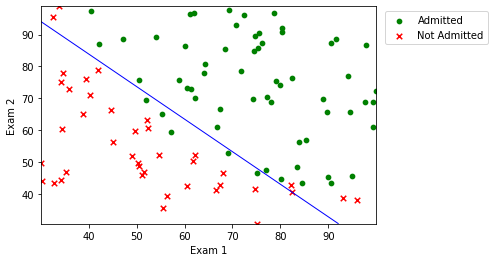

In [60]:
negative = data[:,2] == 0
positive = data[:,2] == 1
axes = plt.gca()
axes.scatter(data[positive][:,0], data[positive][:,1], marker='.', c='g', s=30, linewidth=3, label="Admitted")
axes.scatter(data[negative][:,0], data[negative][:,1], marker='x',c='r', s=30,linewidths=3 ,label="Not Admitted")
axes.set_xlabel("Exam 1")
axes.set_ylabel("Exam 2")
axes.legend(loc='upper right',frameon= True, fancybox = True, bbox_to_anchor=(1.35, 1), ncol=1);
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(res.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b');

### **Regularized Logistic Regression**



In [63]:
data2 = load_data_from_file("/ex2data2.txt")

[[ 0.051267   0.69955    1.       ]
 [-0.092742   0.68494    1.       ]
 [-0.21371    0.69225    1.       ]
 [-0.375      0.50219    1.       ]
 [-0.51325    0.46564    1.       ]
 [-0.52477    0.2098     1.       ]
 [-0.39804    0.034357   1.       ]
 [-0.30588   -0.19225    1.       ]
 [ 0.016705  -0.40424    1.       ]
 [ 0.13191   -0.51389    1.       ]
 [ 0.38537   -0.56506    1.       ]
 [ 0.52938   -0.5212     1.       ]
 [ 0.63882   -0.24342    1.       ]
 [ 0.73675   -0.18494    1.       ]
 [ 0.54666    0.48757    1.       ]
 [ 0.322      0.5826     1.       ]
 [ 0.16647    0.53874    1.       ]
 [-0.046659   0.81652    1.       ]
 [-0.17339    0.69956    1.       ]
 [-0.47869    0.63377    1.       ]
 [-0.60541    0.59722    1.       ]
 [-0.62846    0.33406    1.       ]
 [-0.59389    0.005117   1.       ]
 [-0.42108   -0.27266    1.       ]
 [-0.11578   -0.39693    1.       ]
 [ 0.20104   -0.60161    1.       ]
 [ 0.46601   -0.53582    1.       ]
 [ 0.67339   -0.53582    1. 

In [64]:
y = np.c_[data2[:,2]]
X = data2[:,0:2]

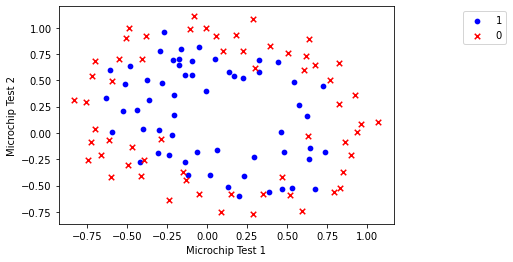

In [71]:
negative = data2[:,2] == 0
positive = data2[:,2] == 1
axes = plt.gca()
axes.scatter(data2[positive][:,0], data2[positive][:,1], marker='.', c='b', s=30, linewidth=3, label="1")
axes.scatter(data2[negative][:,0], data2[negative][:,1], marker='x',c='r', s=30,linewidths=3 ,label="0")
axes.set_xlabel("Microchip Test 1")
axes.set_ylabel("Microchip Test 2")
axes.legend(loc='upper right',frameon= True, fancybox = True, bbox_to_anchor=(1.35, 1), ncol=1);

In [72]:
from sklearn.preprocessing import PolynomialFeatures


In [73]:
poly = PolynomialFeatures(6)
XX = poly.fit_transform(data2[:,0:2])
XX.shape



(118, 28)

In [79]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return(p.astype('int'))

In [75]:
def RegularizedCostFunction(theta, reg, *args):
    m = y.size
    h = sigmoid(XX.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y)) + (reg/(2*m))*np.sum(np.square(theta[1:]))
    
    if np.isnan(J[0]):
        return(np.inf)
    return (J[0])


def RegularizedGradient(theta, reg, *args):
    m = y.size
    h = sigmoid(XX.dot(theta.reshape(-1,1)))
      
    grad = (1/m)*XX.T.dot(h-y) + (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
        
    return (grad.flatten())

initial_theta = np.zeros(XX.shape[1])
RegularizedCostFunction(initial_theta, 1, XX, y)

0.6931471805599454

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


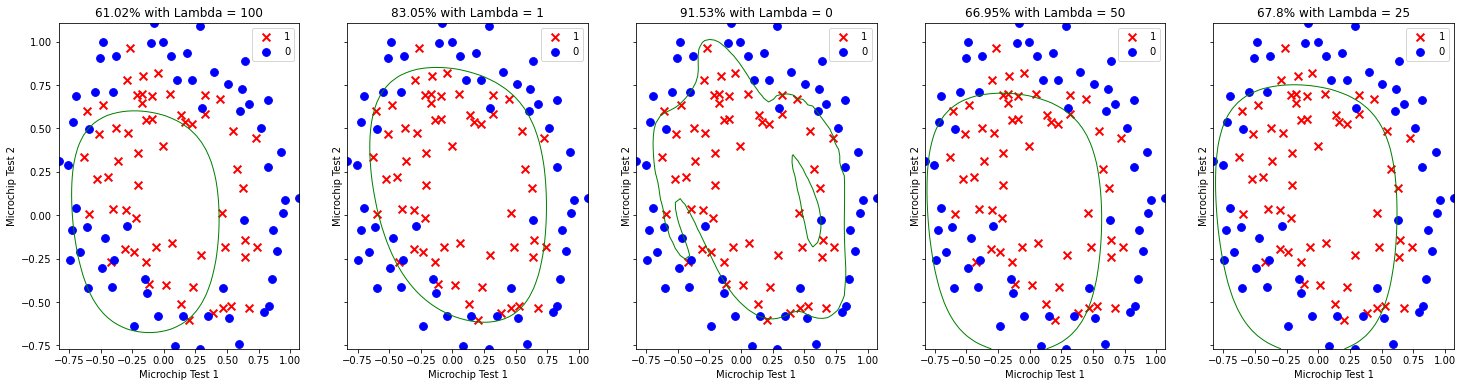

In [104]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='x', c='r', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='b', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

fig, axes = plt.subplots(1,5, sharey = True, figsize=(25,6))


for i, C in enumerate([ 100,1,0,50,25]):
    res2 = minimize(RegularizedCostFunction, initial_theta, args=(C, XX, y), method=None, jac=RegularizedGradient, options={'maxiter':3000})
    accuracy = 100*sum(predict(res2.x, XX) == y.ravel())/y.size    
    plotData(data2, 'Microchip Test 1', 'Microchip Test 2', '1', '0', axes.flatten()[i])
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(res2.x))
    h = h.reshape(xx1.shape)
    axes.flatten()[i].contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');       
    axes.flatten()[i].set_title('{}% with Lambda = {}'.format(np.round(accuracy, decimals=2), C))